In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# from sklearn.model_selection import train_test_split

# Load datasets

X_train = pd.read_parquet(
    r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/Train-test-validation_with_outliers/X_train.parquet"
)
X_test = pd.read_parquet(
    r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/Train-test-validation_with_outliers/X_test.parquet"
)
X_val = pd.read_parquet(
    r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/Train-test-validation_with_outliers/X_val.parquet"
)
y_train = pd.read_parquet(
    r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/Train-test-validation_with_outliers/y_train.parquet"
).squeeze()
y_test = pd.read_parquet(
    r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/Train-test-validation_with_outliers/y_test.parquet"
).squeeze()
y_val = pd.read_parquet(
    r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/Train-test-validation_with_outliers/y_val.parquet"
).squeeze()

In [2]:
# df = pd.read_parquet(
#     r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/cleaned_aviation_data_with_outliers_v4.parquet"
# )

In [3]:
# X = df[
#     [
#         "seats",
#         "acft_class",
#         "n_flights",
#         "departure_continent",
#         "arrival_continent",
#         "departure_country",
#         "arrival_country",
#         "domestic",
#         "ask",
#         "rpk",
#         "fuel_burn",
#     ]
# ]
# y = df["co2_per_distance"]

# # One-hot encode categorical variables

### Adding new features

In [4]:
# X.loc[:, "same_continent"] = X["arrival_country"] == X["departure_country"]
# X.loc[:, "fuel_burn_per_seat"] = X["fuel_burn"] / X["seats"]
# X.loc[:, "ask_per_seat"] = X["ask"] / X["seats"]
# X.loc[:, "ask_per_flight"] = X["ask"] / X["n_flights"]
# X.loc[:, "is_widebody"] = X["acft_class"].apply(lambda x: 1 if x == "WB" else 0)
# X.loc[:, "is_narrowbody"] = X["acft_class"].apply(lambda x: 1 if x == "NB" else 0)

In [5]:
# X = pd.get_dummies(X, drop_first=True)

In [6]:
# # Split into train + validation and test sets (80% train_val, 20% test)
# X_train_val, X_test, y_train_val, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Split train + validation into separate train and validation sets (now 64% train, 16% val)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train_val, y_train_val, test_size=0.2, random_state=42
# )

In [7]:
# X_train.to_parquet(
#     r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/Train-test-validation_with_outliers/X_train.parquet"
# )
# X_test.to_parquet(
#     r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/Train-test-validation_with_outliers/X_test.parquet"
# )
# X_val.to_parquet(
#     r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/Train-test-validation_with_outliers/X_val.parquet"
# )
# y_test.to_frame(name="co2_per_distance").to_parquet(
#     r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/Train-test-validation_with_outliers/y_test.parquet"
# )

# y_train.to_frame(name="co2_per_distance").to_parquet(
#     r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/Train-test-validation_with_outliers/y_train.parquet"
# )
# y_val.to_frame(name="co2_per_distance").to_parquet(
#     r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/Train-test-validation_with_outliers/y_val.parquet"
# )
# # X_train.to_parquet(r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/Train-test-validation_with_outliers/X_train.parquet")

### Checking for correlation

In [8]:
corr_check_df = X_train.merge(y_train, left_index=True, right_index=True)

In [9]:
numeric_df = corr_check_df.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_df.corr()

# Extract correlations with log_co2
log_co2_corr = correlation_matrix["co2_per_distance"].drop(
    "co2_per_distance"
)  # drop self-correlation

# Filter correlations > 0.70 or < -0.70
strong_corr = log_co2_corr[log_co2_corr.abs() > 0.70].sort_values(ascending=False)
print("Features with correlation > 70% (positive or negative):")
print(strong_corr)

Features with correlation > 70% (positive or negative):
seats    0.75208
Name: co2_per_distance, dtype: float64


In [10]:
X_train.isnull().sum()

seats                 0
n_flights             0
domestic              0
ask                   0
rpk                   0
                     ..
arrival_country_YE    0
arrival_country_YT    0
arrival_country_ZA    0
arrival_country_ZM    0
arrival_country_ZW    0
Length: 495, dtype: int64

In [11]:
log_co2_corr

seats                 0.752080
n_flights             0.434209
domestic              0.068756
ask                   0.396830
rpk                   0.396830
fuel_burn             0.435987
fuel_burn_per_seat   -0.012131
ask_per_seat         -0.037736
ask_per_flight        0.365503
is_widebody          -0.022272
is_narrowbody        -0.088030
Name: co2_per_distance, dtype: float64

## Excluding seats for high correlation

In [12]:
for df_split in [X_train, X_val, X_test]:
    df_split.drop(columns="seats", inplace=True)

In [13]:
# # Identify categorical columns
# categorical_cols = X_train.select_dtypes(
#     include=["object", "category"]
# ).columns.tolist()

In [14]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [15]:
# Predict on test set
y_pred_test = rf.predict(X_test)

In [16]:
# Evaluate on test set
r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"R-squared (R²): {r2:.4f}")
# print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Predict and evaluate on validation set
y_pred_val = rf.predict(X_val)

r2_val = r2_score(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

print("\nValidation Set Performance:")
print(f"R-squared (R²): {r2_val:.4f}")
# print(f"Mean Squared Error (MSE): {mse_val:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.4f}")
print(f"Mean Absolute Error (MAE): {mae_val:.4f}")

R-squared (R²): 0.9938
Root Mean Squared Error (RMSE): 442.6724
Mean Absolute Error (MAE): 21.5809

Validation Set Performance:
R-squared (R²): 0.9957
Root Mean Squared Error (RMSE): 355.7666
Mean Absolute Error (MAE): 18.9042


### Feature importances 

/var/folders/cv/pb7bdsd97cq7qt_b65khbfvr0000gn/T/ipykernel_90412/16169919.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(30), y="feature", x="importance", palette="viridis")


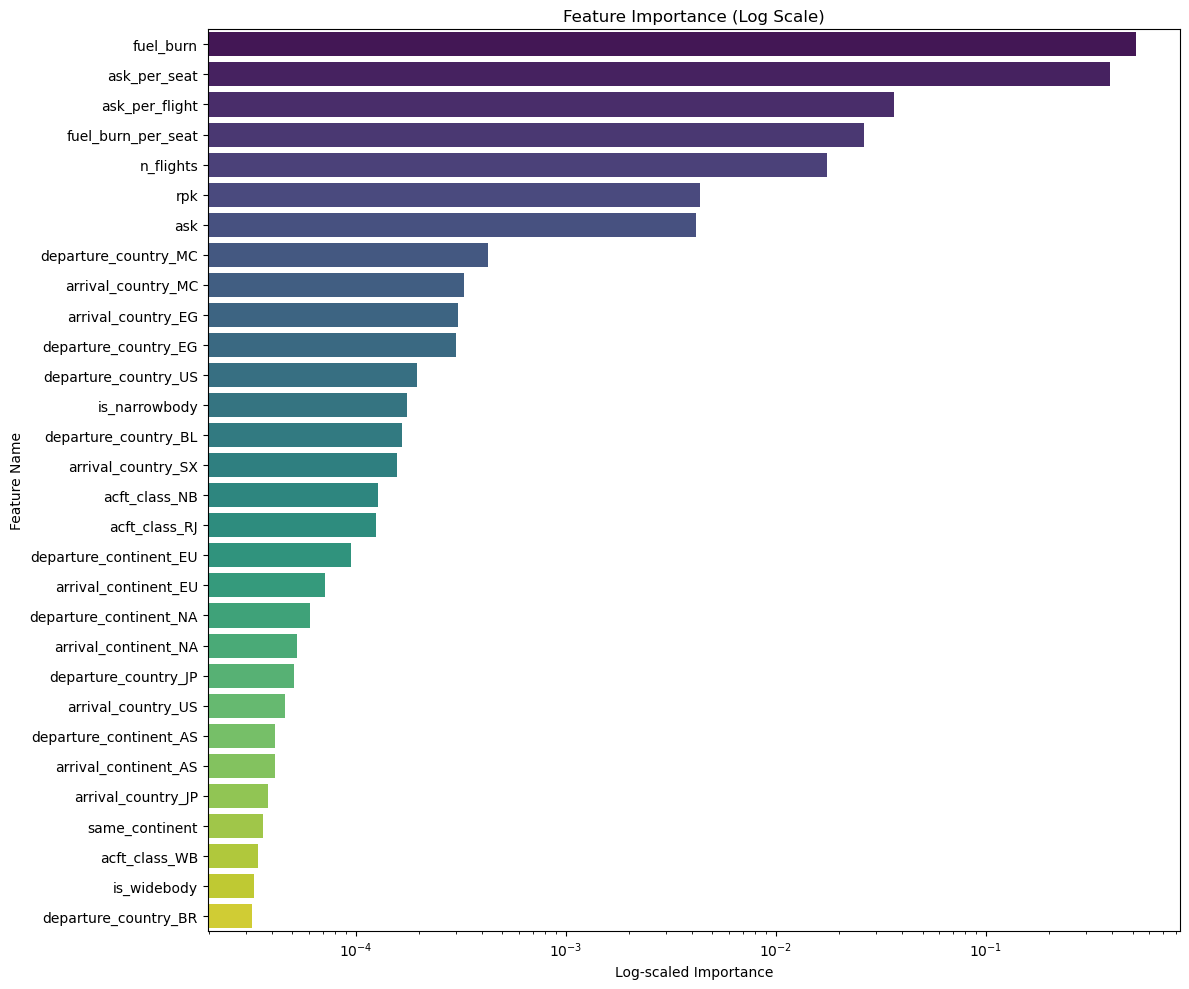

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


importances = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame(
    {"feature": feature_names, "importance": importances}
).sort_values(by="importance", ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(data=importance_df.head(30), y="feature", x="importance", palette="viridis")
plt.xscale("log")  # make importances easier to compare
plt.title("Feature Importance (Log Scale)")
plt.xlabel("Log-scaled Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

In [18]:
X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_final = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_final.fit(X_full_train, y_full_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [20]:
y_test_pred = rf_final.predict(X_test)  # for final evaluation

y_all_pred = rf_final.predict(pd.concat([X_train, X_val, X_test]))  # full set

In [21]:
r2_final_test = r2_score(y_test, y_test_pred)
mse_final_test = mean_squared_error(y_test, y_test_pred)
rmse_final_test = np.sqrt(mse_val)
mae_final_test = mean_absolute_error(y_test, y_test_pred)

print("Performance on the full training data:")
print(f"R-squared (R²): {r2_final_test:.4f}")
# print(f"Mean Squared Error (MSE): {mse_val:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_final_test:.4f}")

Performance on the full training data:
R-squared (R²): 0.9981
Root Mean Squared Error (RMSE): 355.7666
Mean Absolute Error (MAE): 15.9523


In [22]:
pd.DataFrame({"y_pred": y_all_pred}).to_csv("final_predictions.csv", index=False)